In [1]:
import pandas as pd #导入pandas包
import numpy as np #导入numpy包
from sklearn.model_selection import train_test_split #导入此包用来进行分割训练集和测试集
from sklearn.metrics import mean_squared_error # 导入此包用来进行计算均方根误差
from sklearn.svm import SVR # 导入支持向量机回归包函数
from sklearn.preprocessing import StandardScaler #导入此包数据特征的处理
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn import svm
import warnings
import shap
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#导入数据
data = pd.read_excel(r"F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\空气补气速度.xlsx")
# 分离特征值和结果值
data_x = data.iloc[:,0:4]
data_y = data.iloc[:,4:5]

In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [4]:
# 特征缩放
scaler = StandardScaler() #创建一个scaler的示例函数
X_train = scaler.fit_transform(X_train) #将训练特征转化为零均值、单位方差
X_test = scaler.transform(X_test)#将测试特征转化为零均值、单位方差

In [ ]:
warnings.filterwarnings("ignore")
# 找到支持向量机回归性能最好的核函数 
param_grid = {
    'C': [0.1, 1, 10,50, 100,200,300,400,500,500],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear','Poly','rbf','sigmoid']  # 你可以试验不同的核函数
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("最佳参数: ", grid_search.best_params_)
print("最佳分数（负均方误差）: ", grid_search.best_score_)

best_params = grid_search.best_params_
model = svm.SVR(kernel=best_params['kernel'],C=best_params['C'],gamma=best_params['gamma'],cache_size=50000)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mes = mean_squared_error(y_test,y_test_pred)
print("MES: ", mes)
r2_test = r2_score(y_test, y_test_pred)
print("测试集r2: ", r2_test)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("训练集r2: ", r2_train)
# 对测试集进行MAE计算
mae_test = mean_absolute_error(y_test, y_test_pred)
print("测试集MAE: ", mae_test)
# 对训练集进行MAE计算
mae_train = mean_absolute_error(y_train, y_train_pred)
print("训练集MAE: ", mae_train)

In [17]:
# 最佳参数对于SVR模型的训练
model = svm.SVR(kernel='rbf',C= 300,gamma=0.1,cache_size=50000)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mes = mean_squared_error(y_test,y_test_pred)
print("MES: ", mes)
r2_test = r2_score(y_test, y_test_pred)
print("测试集r2: ", r2_test)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("训练集r2: ", r2_train)
# 对测试集进行MAE计算
mae_test = mean_absolute_error(y_test, y_test_pred)
print("测试集MAE: ", mae_test)
# 对训练集进行MAE计算
mae_train = mean_absolute_error(y_train, y_train_pred)
print("训练集MAE: ", mae_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MES:  0.011410783119000784
测试集r2:  0.9844349259642751
训练集r2:  0.9925063725998857
测试集MAE:  0.0839080111993869
训练集MAE:  0.06375551527543515


In [11]:
# train数据的保存
y_train_data = pd.DataFrame(y_train)
y_train_data = y_train.reset_index()
y_train_pred_data = pd.DataFrame(y_train_pred)
y_train_pred_data = y_train_pred_data.reset_index()
train_data = pd.concat([y_train_data,y_train_pred_data],axis=1,ignore_index=True)
train_data_base = train_data[[1,3]].to_csv(r'F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\3-不同机器学习模型下预测效果的判定\SVR\SVR_train.csv')

In [13]:
# train数据的保存
y_test_data = pd.DataFrame(y_test)
y_test_data = y_test.reset_index()
y_test_pred_data = pd.DataFrame(y_test_pred)
y_test_pred_data = y_test_pred_data.reset_index()
test_data = pd.concat([y_test_data,y_test_pred_data],axis=1,ignore_index=True)
test_data_base = test_data[[1,3]].to_csv(r'F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\3-不同机器学习模型下预测效果的判定\SVR\SVR_test.csv')

Using 224 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/96 [00:00<?, ?it/s]

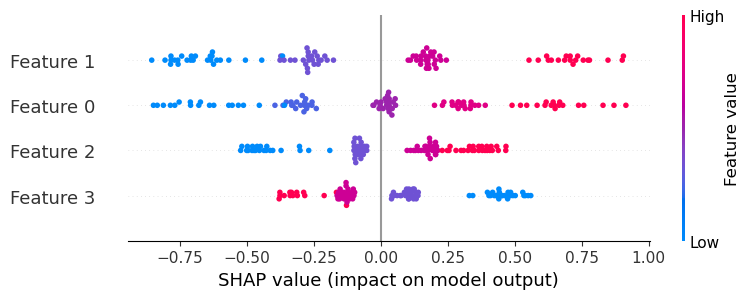

ValueError: Could not find feature named: FeatureName

In [19]:
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)
# 可视化单个预测的SHAP值
shap.initjs() # 初始化用于JavaScript可视化的环境

index_to_explain = 0  # 修改为你想要解释的样本索引
shap.force_plot(explainer.expected_value, shap_values[index_to_explain], X_test[index_to_explain])
# 可视化特征的全局重要性
shap.summary_plot(shap_values, X_test)

# 可视化单个特征的SHAP值分布
feature_to_explain = 'FeatureName' # 替换为你想要可视化的特征名称
shap.dependence_plot(feature_to_explain, shap_values, X_test)

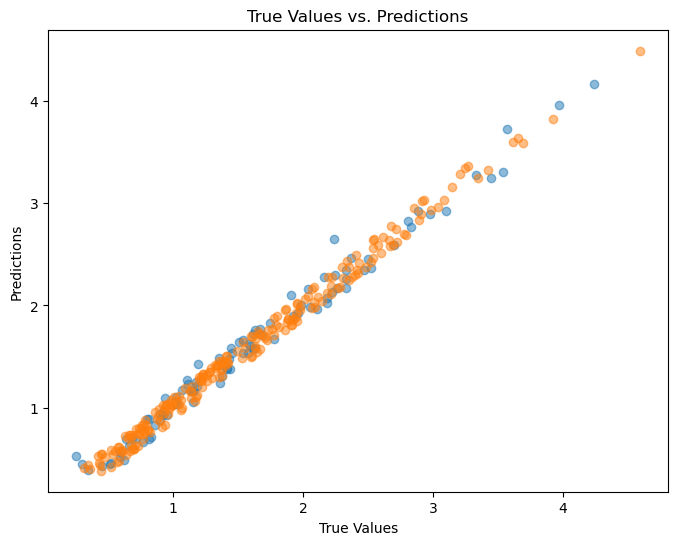

In [17]:
# 对数据进行相应的可视化操作
plt.figure(figsize=(8, 6))  # 设置图形大小
# 绘制散点图
plt.scatter(y_test, y_test_pred, alpha=0.5)  # 绘制散点图，alpha参数控制点的透明度
plt.scatter(y_train, y_train_pred, alpha=0.5)  # 绘制散点图，alpha参数控制点的透明度
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')

# 绘制一条对角线，表示理想情况下预测值等于真实值
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# 显示图形
plt.show()

In [2]:
pip install shap

  Using cached shap-0.45.0-cp39-cp39-win_amd64.whl (453 kB)
Note: you may need to restart the kernel to use updated packages.
